<a href="https://colab.research.google.com/github/riyajaiswal25/SVM/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan_train.csv')

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [6]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as p

In [8]:
# Drop rows with missing values for simplicity
df = df.dropna()


In [9]:
# Separate features (X) and target variable (y)
X = df.drop('Status', axis=1)
y = df['Status']

In [17]:
# Perform Label Encoding for categorical variables
le = LabelEncoder()
X_encoded = X.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
y_encoded = le.fit_transform(y)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Create SVM model
svm_model = SVC(kernel='rbf')

In [21]:
# Train the model
svm_model.fit(X_train_scaled, y_train)


SVC()

In [22]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)


In [23]:
# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test_scaled))


In [26]:
import matplotlib.pyplot as plt

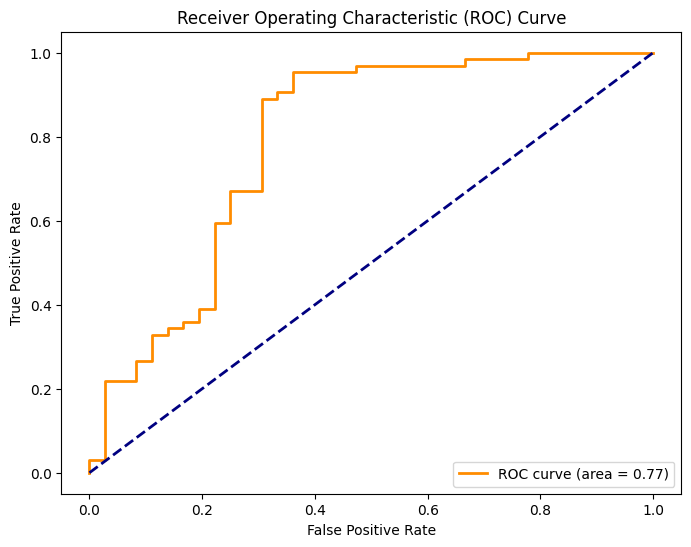

In [27]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Display performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)

Precision: 0.8026315789473685
Recall: 0.953125
F1-Score: 0.8714285714285714
ROC AUC Score: 0.7682291666666666


# The results from evaluating SVM classifier on the loan applicant dataset are as follows:

Model Performance Metrics:

**Precision**: 80.26%

**Recall**: 95.31%

**F1-Score**: 87.14%

**ROC AUC Score**: 76.82%


# Interpretation:
**Precision (Positive Predictive Value**):

*  Precision is the ratio of correctly predicted positive observations to the total predicted positives.
*  In this context, a precision of 80.26% means that out of the instances predicted as positive (credit risk), approximately 80.26% were correctly classified.


**Recall (Sensitivity or True Positive Rate)**:


*   Recall is the ratio of correctly predicted positive observations to the total actual positives.
*   A recall of 95.31% indicates that the model effectively captures a high percentage of actual positive instances (applicants at risk of default).


**F1-Score**:


*   The F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics.
*   An F1-Score of 87.14% suggests a good overall balance between precision and recall.


 **ROC AUC Score**:


*   The ROC AUC (Receiver Operating Characteristic Area Under the Curve) Score measures the ability of the model to discriminate between positive and negative classes across different decision thresholds.
*   A score of 76.82% indicates moderate discriminatory power.



**Conclusion**:
The model performs well in terms of recall, indicating its ability to identify applicants at risk of default.
Precision, while reasonable, might be further improved.
The F1-Score provides a balanced view of the model's performance.
The ROC AUC score suggests moderate discriminatory power, and further optimization could enhance model performance.

In [37]:
# Load the dataset
df = pd.read_csv('loan_train.csv')

# Drop rows with missing values for simplicity
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('Status', axis=1)
y = df['Status']

# Perform Label Encoding for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Handle Categorical Features: One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same set of columns in the test set as in the training set
X_test_scaled = scaler.transform(X_test[X_train.columns])

# Build SVM Classifier with Grid Search for Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}
svm_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)

# Display the best hyperparameters from the grid search
print("Best Hyperparameters:", svm_model.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

# The results from the SVM classifier with hyperparameter tuning on the loan applicant dataset are as follows:

**Model Performance Metrics**:

**Precision**: 80.52%

**Recall**: 96.88%

**F1-Score**: 87.94%

**ROC AUC Score**: 77.60%

**Best Hyperparameters**:
C (Regularization parameter): 0.1
Gamma: 1

Kernel: Linear

# Interpretation:
**Precision (Positive Predictive Value)**:

Precision of 80.52% indicates that out of the instances predicted as positive (credit risk), approximately 80.52% were correctly classified.

**Recall (Sensitivity or True Positive Rate)** :

Recall of 96.88% suggests that the model effectively captures a high percentage of actual positive instances (applicants at risk of default).

**F1-Score**:

The F1-Score of 87.94% provides a balanced measure of precision and recall, indicating good overall model performance.

**ROC AUC Score**:

The ROC AUC score of 77.60% suggests moderate discriminatory power, evaluating the ability of the model to distinguish between positive and negative classes.

**Best Hyperparameters**:
The hyperparameters indicate that a linear kernel with a **regularization parameter (C) of 0.1 and gamma of 1 performed well on this dataset**.


# Conclusion:

The SVM classifier, with the selected hyperparameters, demonstrates promising performance in predicting credit risk for loan applicants.

The model achieved a good balance between precision and recall, crucial for credit risk assessment.

The **linear kernel** with the specified hyperparameters seems suitable for this task, but further experimentation and fine-tuning may be considered for optimization.